# Tydzień Programisty 2021 - warsztaty Data Science

## Modelowanie Szeregów Czasowych

### Program

1. Czym są szeregi czasowe?
2. Opis szeregu czasowego.
3. Projekt #1: Rozkład szeregu.
4. Projekt #2: Losowanie.
5. Projekt #3: Model Naiwny.
6. Projekt #4: Regresja Wielomianowa.
7. Projekt #5: Wygładzanie wykładnicze.
9. (Zadanie domowe) Zestawienie modeli.



### 1. Czym są szeregi czasowe?

In [164]:
import numpy as np
import pandas as pd

In [165]:
# Sygnał

x = 10

if x < 20:
  print('To jest sygnał')

To jest sygnał


In [166]:
# Sekwencja

x = 'To jest sekwencja znaków'
x = list(x)
print(x)

['T', 'o', ' ', 'j', 'e', 's', 't', ' ', 's', 'e', 'k', 'w', 'e', 'n', 'c', 'j', 'a', ' ', 'z', 'n', 'a', 'k', 'ó', 'w']


In [167]:
x = np.arange(-10, 11, 1)
print(x)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [168]:
# Szereg czasowy

time_start = '2021-01-01'
days_ahead = 90

ts = pd.date_range(time_start, periods=days_ahead, freq='d')
ts

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [169]:
ticks = np.arange(0, 1, 1/len(ts))
vals = 200 * np.sin(2*np.pi * 50 * ticks)
vals

array([ 0.00000000e+00, -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,
        1.96961551e+02, -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,
        6.84040287e+01,  4.65613376e-13, -6.84040287e+01,  1.28557522e+02,
       -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,  1.73205081e+02,
       -1.28557522e+02,  6.84040287e+01,  9.31226752e-13, -6.84040287e+01,
        1.28557522e+02, -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,
        1.73205081e+02, -1.28557522e+02,  6.84040287e+01,  6.86297392e-13,
       -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,  1.96961551e+02,
       -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,  6.84040287e+01,
        1.86245350e-12, -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,
        1.96961551e+02, -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,
        6.84040287e+01,  1.96438672e-13, -6.84040287e+01,  1.28557522e+02,
       -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,  1.73205081e+02,
       -1.28557522e+02,  

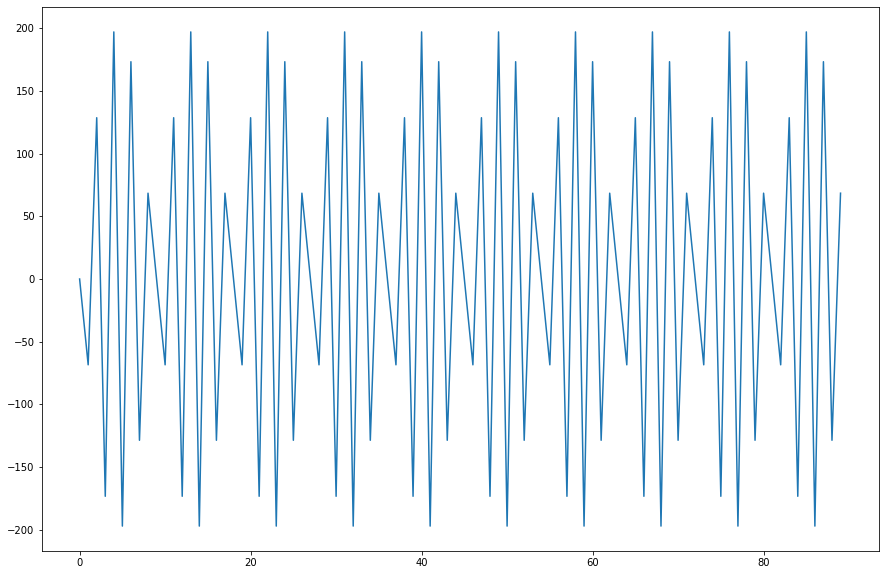

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(vals)
plt.show()

In [171]:
# Add time

series = pd.Series(data=vals, index=ts)
series

2021-01-01      0.000000
2021-01-02    -68.404029
2021-01-03    128.557522
2021-01-04   -173.205081
2021-01-05    196.961551
                 ...    
2021-03-27    196.961551
2021-03-28   -196.961551
2021-03-29    173.205081
2021-03-30   -128.557522
2021-03-31     68.404029
Freq: D, Length: 90, dtype: float64

In [172]:
series.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

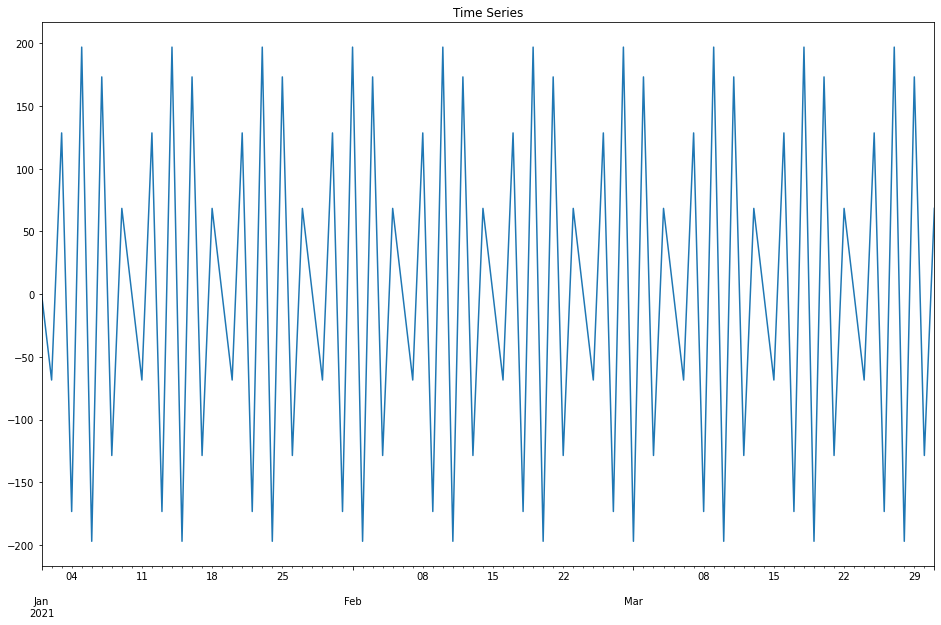

In [173]:
series.plot(figsize=(16, 10), title='Time Series')

## 2. Składowe szeregu czasowego

In [174]:
# Trend

def generate_trend(a, b, length):
  trend = a * np.arange(0, length) + b
  return trend

trendline = generate_trend(0.3, 0.1, 365)

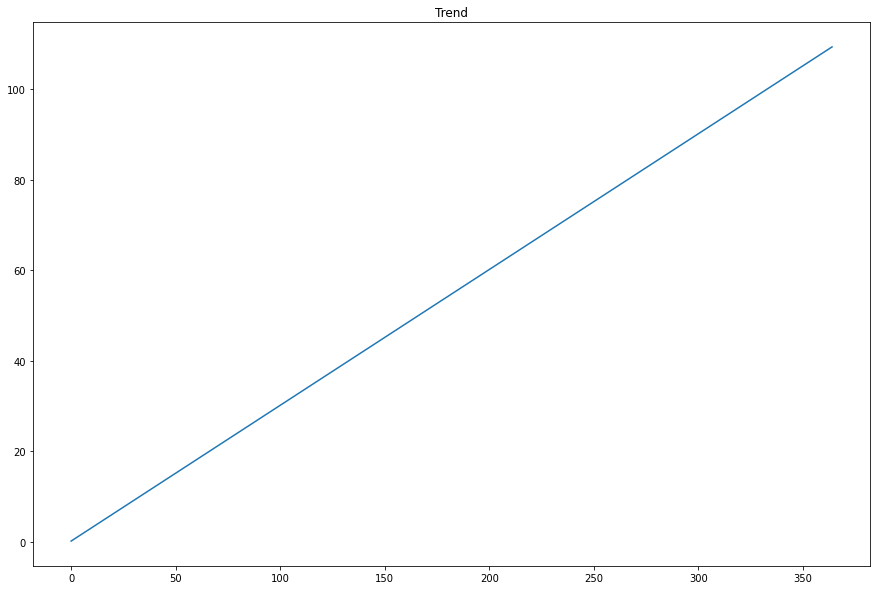

In [175]:
plt.figure(figsize=(15, 10))
plt.plot(trendline)
plt.title('Trend')
plt.show()

In [176]:
# Sezonowość

def generate_seasonal_wave(amp, season_length, freq=2, always_positive=True):
  ticks = np.arange(0, 1, 1/season_length)
  vals = amp * np.sin(2*np.pi * freq * ticks)
  if always_positive:
    vals = vals + np.abs(np.min(vals))
  return vals

seasonalwave = generate_seasonal_wave(60, 365)

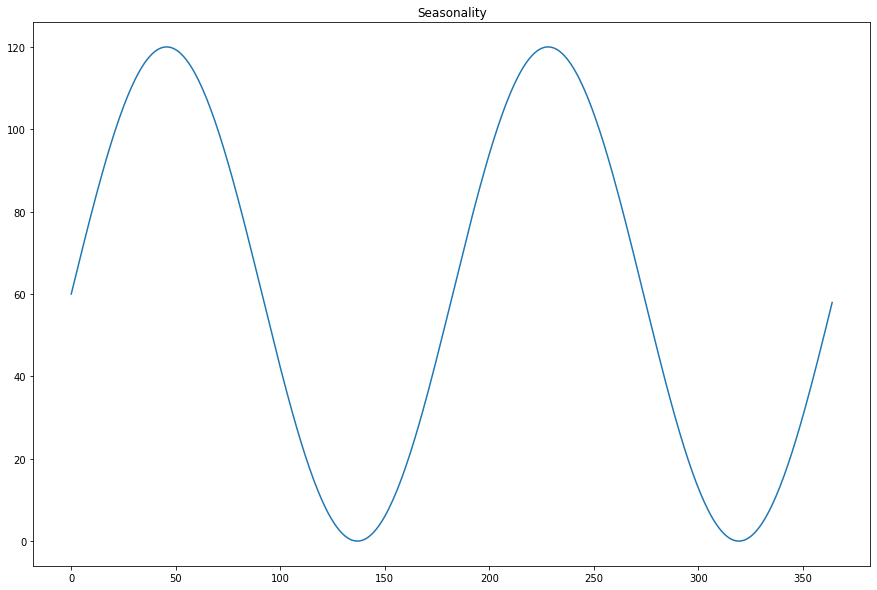

In [177]:
plt.figure(figsize=(15, 10))
plt.plot(seasonalwave)
plt.title('Seasonality')
plt.show()

In [178]:
# Błąd (reszta albo szum)

def generate_random_noise(amp, length):
  noise = (2*np.random.rand(length) - 1) * amp
  return noise

noisewave = generate_random_noise(8, len(trendline))

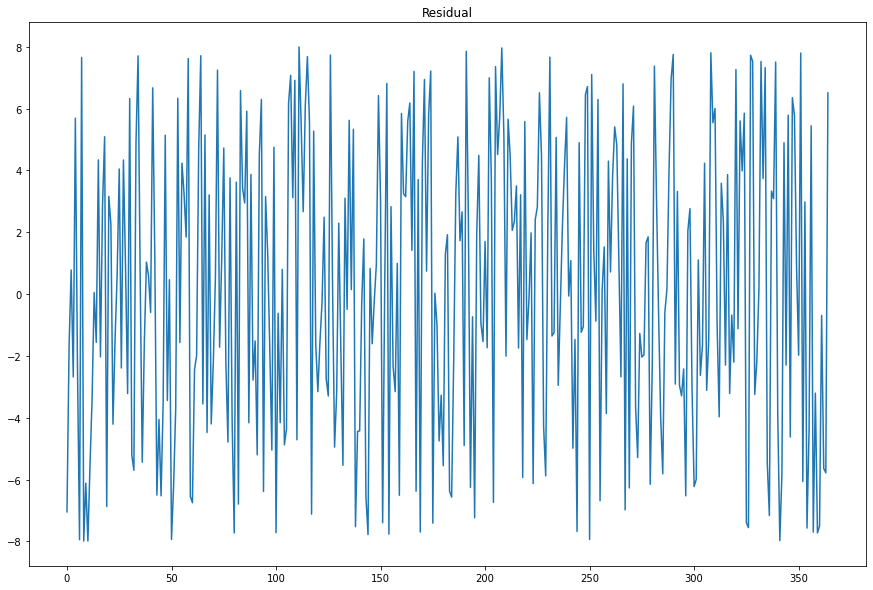

In [179]:
plt.figure(figsize=(15, 10))
plt.plot(noisewave)
plt.title('Residual')
plt.show()

In [180]:
# I konstrukcja "rzeczywistego" szeregu

wave = trendline + seasonalwave + noisewave
wseries = pd.Series(data=wave, index=pd.date_range('2021-01-01', periods=365, freq='D'))

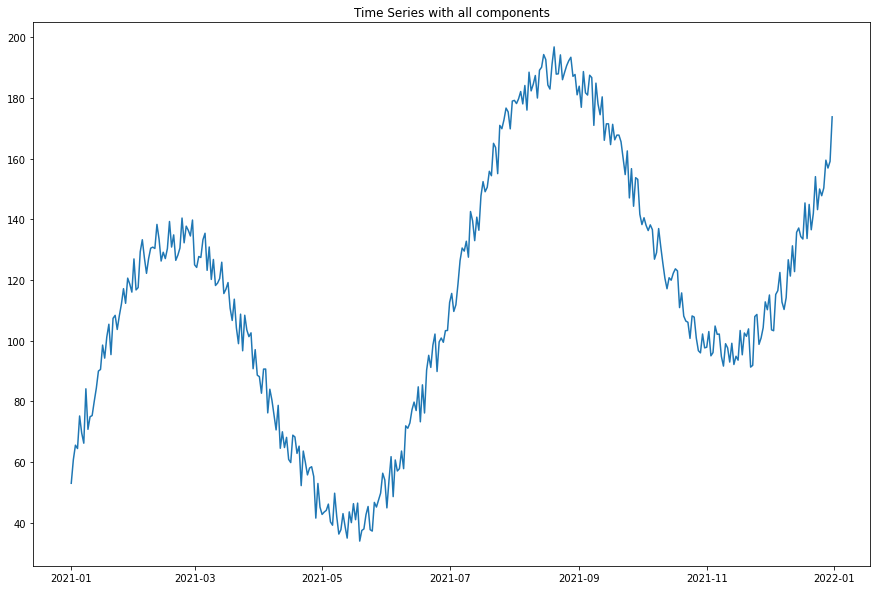

In [181]:
plt.figure(figsize=(15, 10))
plt.plot(wseries)
plt.title('Time Series with all components')
plt.show()

### 3. Rozkład szeregu na składowe (projekt #1)

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [183]:
decomposed = seasonal_decompose(wseries)

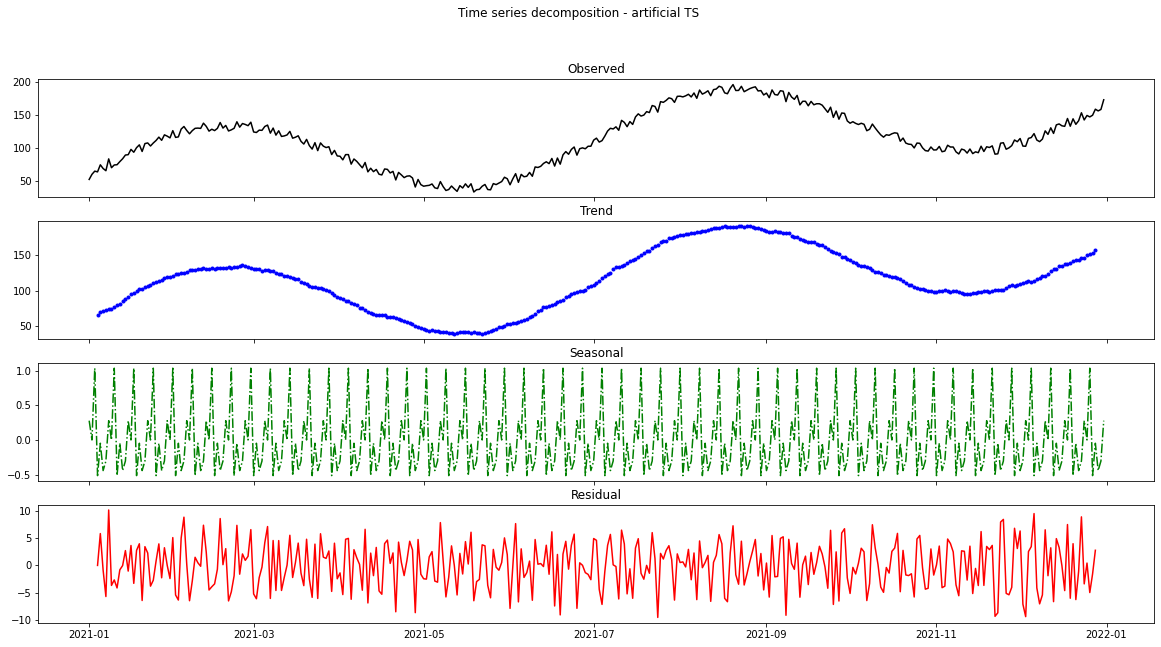

In [184]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20, 10))
fig.suptitle('Time series decomposition - artificial TS')
axes[0].plot(decomposed.observed, color='black')
axes[1].plot(decomposed.trend, '.b')
axes[2].plot(decomposed.seasonal, '-.g')
axes[3].plot(decomposed.resid, '-r')
axes[0].title.set_text('Observed')
axes[1].title.set_text('Trend')
axes[2].title.set_text('Seasonal')
axes[3].title.set_text('Residual')

In [185]:
decomposed = seasonal_decompose(wseries, freq=int(365/2))

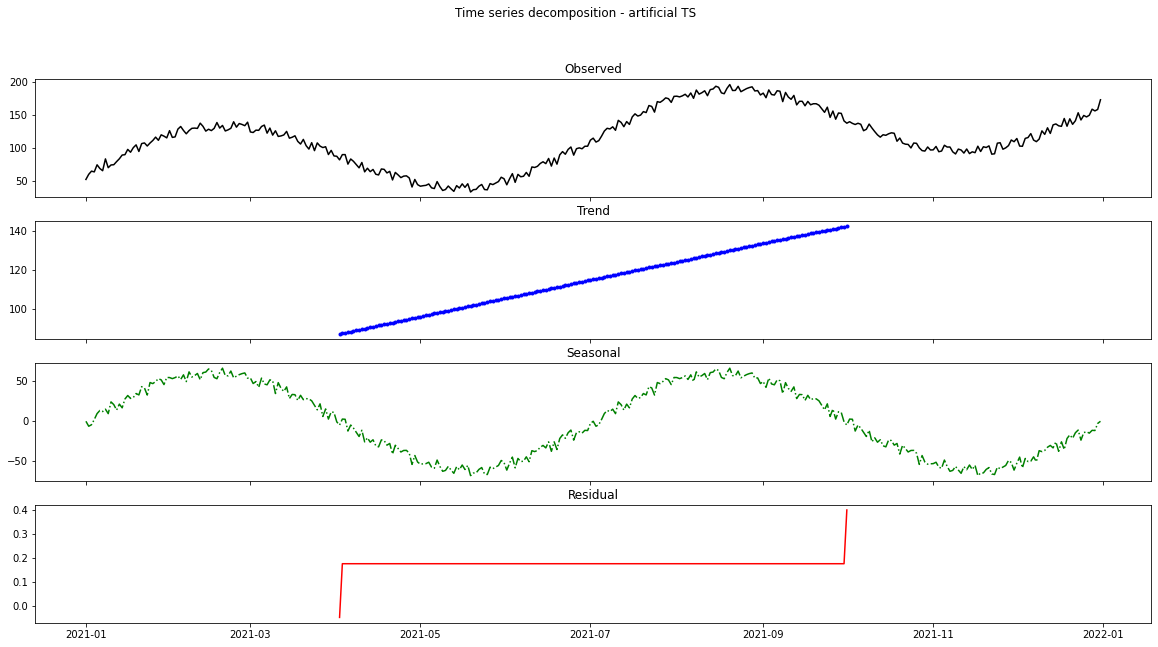

In [186]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20, 10))
fig.suptitle('Time series decomposition - artificial TS')
axes[0].plot(decomposed.observed, color='black')
axes[1].plot(decomposed.trend, '.b')
axes[2].plot(decomposed.seasonal, '-.g')
axes[3].plot(decomposed.resid, '-r')
axes[0].title.set_text('Observed')
axes[1].title.set_text('Trend')
axes[2].title.set_text('Seasonal')
axes[3].title.set_text('Residual')

### 3. RMSE i liczby losowe (projekt #2)

In [189]:
# Losowanie

np.random.randint(10, 14)  # wartości całkowite z danego przedziału

13

In [195]:
np.random.rand(3, 3)  # pseudo-losowa wartości z przedziału 0:1

array([[0.2911675 , 0.03699209, 0.94520909],
       [0.490867  , 0.50779718, 0.48496969],
       [0.01791283, 0.66997926, 0.16318474]])

In [191]:
seq = list('abbbcdbba')
seq

['a', 'b', 'b', 'b', 'c', 'd', 'b', 'b', 'a']

In [192]:
np.random.choice(seq)

'b'

In [196]:
# RMSE

real = 10
predicted = 12

rmse = np.sqrt((real - predicted)**2)
print(rmse)

2.0


In [199]:
# Podział w pandas

# Używamy .loc[] chcąc dzielić od konkretnego indeksu:

wseries.loc['2021-04-08':]

2021-04-08     75.655366
2021-04-09     70.638138
2021-04-10     78.729562
2021-04-11     64.579886
2021-04-12     70.015743
                 ...    
2021-12-27    150.319717
2021-12-28    159.474307
2021-12-29    156.877074
2021-12-30    159.088378
2021-12-31    173.743274
Freq: D, Length: 268, dtype: float64

In [200]:
# Albo .iloc[] chcąc dzielić zgodnie z numerem indeksu

wseries.iloc[-5:]

2021-12-27    150.319717
2021-12-28    159.474307
2021-12-29    156.877074
2021-12-30    159.088378
2021-12-31    173.743274
Freq: D, dtype: float64

In [203]:
# Ważne! W przypadku szeregów czasowych może istnieć potrzeba wcześniejszego sortowania!

wseries = wseries.sort_index(ascending=False)

In [204]:
wseries

2021-12-31    173.743274
2021-12-30    159.088378
2021-12-29    156.877074
2021-12-28    159.474307
2021-12-27    150.319717
                 ...    
2021-01-05     75.226695
2021-01-04     64.506749
2021-01-03     65.609020
2021-01-02     60.794131
2021-01-01     53.057478
Freq: -1D, Length: 365, dtype: float64

In [205]:
# Operacje na szeregach przebiegają podobnie jak na macierzach numpy

wseries / 100

2021-12-31    1.737433
2021-12-30    1.590884
2021-12-29    1.568771
2021-12-28    1.594743
2021-12-27    1.503197
                ...   
2021-01-05    0.752267
2021-01-04    0.645067
2021-01-03    0.656090
2021-01-02    0.607941
2021-01-01    0.530575
Freq: -1D, Length: 365, dtype: float64

In [207]:
wseries = wseries.sort_index()

### 4. Model Naiwny (projekt #3)

In [208]:
def naive_forecast(historical):
  return historical[-1]

naive_forecast(wseries)

173.74327378035406

In [214]:
def calculate_mae(real, pred):
  mae = np.mean(np.abs(real - pred))
  return mae

In [210]:
naive_forecasts = wseries.shift(1) 

In [211]:
naive_forecasts

2021-01-01           NaN
2021-01-02     53.057478
2021-01-03     60.794131
2021-01-04     65.609020
2021-01-05     64.506749
                 ...    
2021-12-27    147.766720
2021-12-28    150.319717
2021-12-29    159.474307
2021-12-30    156.877074
2021-12-31    159.088378
Freq: D, Length: 365, dtype: float64

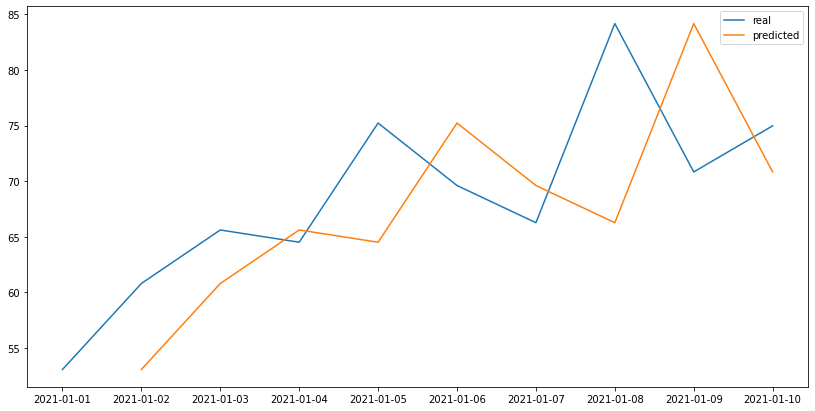

In [213]:
plt.figure(figsize=(14, 7))
plt.plot(wseries[:10])
plt.plot(naive_forecasts[:10])
plt.legend(['real', 'predicted'])
plt.show()

In [215]:
calculate_mae(wseries, naive_forecasts)

5.604317102076073

### 5. Model Regresji Wielomianowej (Projekt #4)

In [260]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import OLS

In [261]:
# Przygotuj model regresji wielomianowej poziomu 1

base = np.arange(0, len(wseries))
features = PolynomialFeatures(degree=1)
transformed = features.fit_transform(base.reshape(-1, 1))

In [262]:
features

PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C')

In [263]:
transformed[-10:]

array([[  1., 355.],
       [  1., 356.],
       [  1., 357.],
       [  1., 358.],
       [  1., 359.],
       [  1., 360.],
       [  1., 361.],
       [  1., 362.],
       [  1., 363.],
       [  1., 364.]])

In [264]:
model = OLS(wseries, transformed).fit()

In [265]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     54.32
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.16e-12
Time:                        13:42:45   Log-Likelihood:                -1859.8
No. Observations:                 365   AIC:                             3724.
Df Residuals:                     363   BIC:                             3731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.4751      4.138     21.380      0.000      80.337      96.613
x1             0.1450      0.020      7.370      0.000       0.106       0.184
==============================================================================
Omnibus:                       87.493   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.663
Skew:                           0.026   Prob(JB):                     0.000241
Kurtosis:                       1.955   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
model.params

const    88.475143
x1        0.145034
dtype: float64

In [267]:
# Predykcja

x_pred = np.arange(len(wseries), len(wseries) + 1)

transformed = features.fit_transform(x_pred.reshape((-1, 1)))
predicted = model.predict(transformed)
predicted

array([141.41273233])

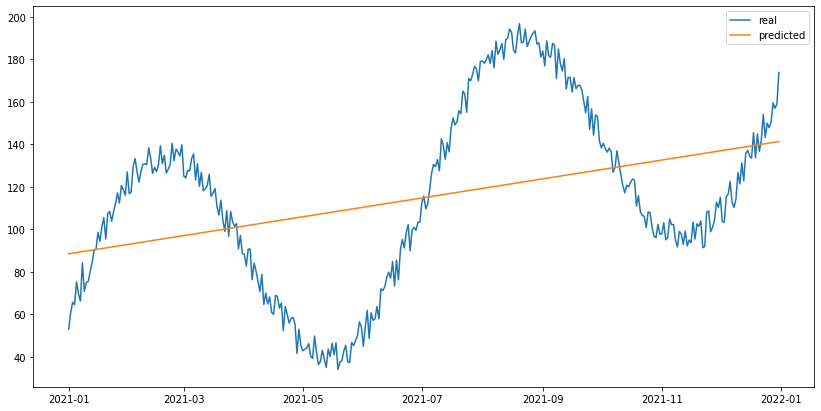

In [268]:
# Interpolacja

plt.figure(figsize=(14, 7))
plt.plot(wseries)
plt.plot(model.fittedvalues)
plt.legend(['real', 'predicted'])
plt.show()

In [275]:
# Zbuduj model 2 poziomu w oparciu o 5 ostatnich wartości

def poly_model(training, level, steps_ahead):
  base = np.arange(0, len(training))
  features = PolynomialFeatures(degree=level)
  transformed = features.fit_transform(base.reshape(-1, 1))
  model = OLS(training, transformed).fit()

  x_pred = np.arange(len(training), len(training) + steps_ahead)
  _transformed = features.fit_transform(x_pred.reshape((-1, 1)))
  predicted = model.predict(_transformed)

  new_index = pd.date_range(start=training.index[-1],
                            periods=steps_ahead + 1,
                            freq=training.index.freq)[1:]
  
  y_pred = pd.Series(data=predicted, index=new_index)
  y_pred.name = training.name
  y_pred.index.freq = training.index.freq

  return y_pred

In [271]:
training_set = wseries[-10:-5]
training_set

2021-12-22    141.976621
2021-12-23    154.050055
2021-12-24    143.183389
2021-12-25    149.977148
2021-12-26    147.766720
Freq: D, dtype: float64

In [272]:
test_set = wseries[-5:]

In [273]:
test_set

2021-12-27    150.319717
2021-12-28    159.474307
2021-12-29    156.877074
2021-12-30    159.088378
2021-12-31    173.743274
Freq: D, dtype: float64

In [276]:
predictions = poly_model(training_set, 2, len(test_set))
predictions

2021-12-27    144.189324
2021-12-28    139.486403
2021-12-29    133.225297
2021-12-30    125.406005
2021-12-31    116.028527
Freq: D, dtype: float64

In [277]:
# Oblicz średni błąd predykcji dla 5 ostatnich wartości

In [278]:
np.mean(np.abs(test_set - predictions))

28.2334387588242

In [279]:
np.mean(np.abs(test_set - training_set[-1]))  # Naiwny model

12.133830178120514

### 6. Model Holt-Winters (Projekt #5)

In [281]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

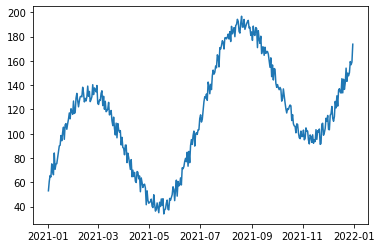

In [282]:
plt.plot(wseries)

In [296]:
model = ExponentialSmoothing(wseries[:-10], trend='add', freq='D')
fitted = model.fit()
predicted = fitted.forecast(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


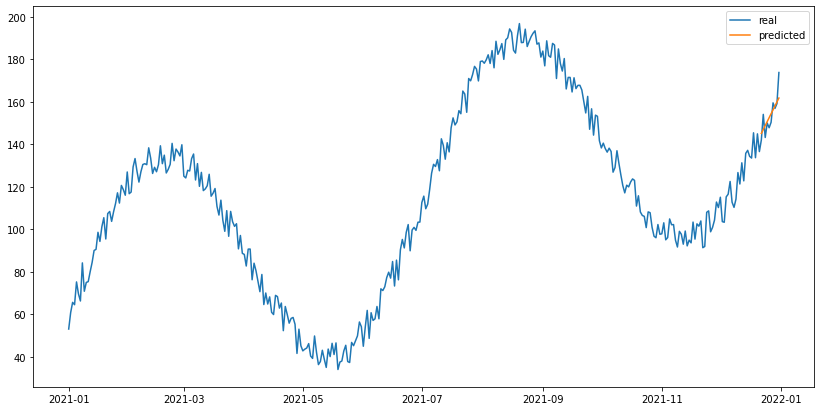

In [297]:
plt.figure(figsize=(14, 7))
plt.plot(wseries)
plt.plot(predicted)
plt.legend(['real', 'predicted'])
plt.show()

In [298]:
model = ExponentialSmoothing(wseries[:-20], trend='add', freq='D')
fitted = model.fit()
predicted = fitted.forecast(20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


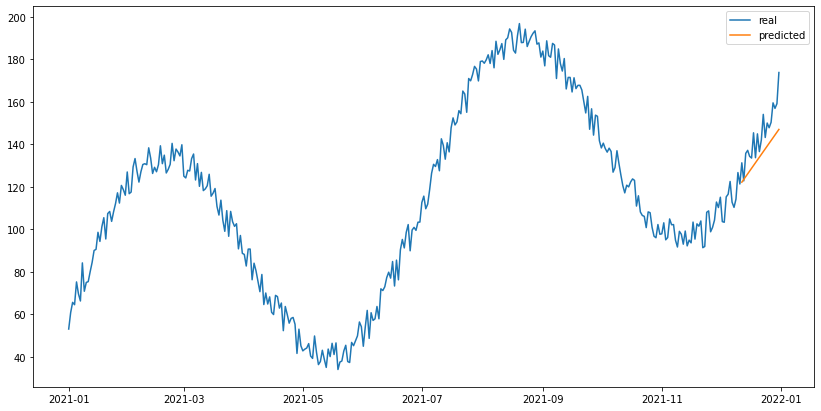

In [299]:
plt.figure(figsize=(14, 7))
plt.plot(wseries)
plt.plot(predicted)
plt.legend(['real', 'predicted'])
plt.show()

In [300]:
calculate_mae(wseries[-20:], predicted)

10.086154899018755

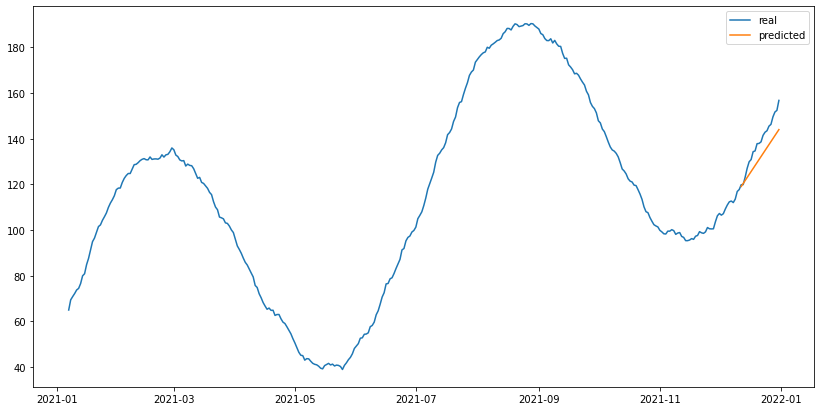

In [309]:
# Rolling Window

model = ExponentialSmoothing(wseries[:-20].rolling(7, closed='right').mean()[7:], trend='add', freq='D')
fitted = model.fit()
predicted = fitted.forecast(20)

plt.figure(figsize=(14, 7))
plt.plot(wseries.rolling(7, closed='right').mean())
plt.plot(predicted)
plt.legend(['real', 'predicted'])
plt.show()

In [310]:
calculate_mae(wseries[-20:], predicted)

13.061773630705966

### 7. Zestawienie modeli (Projekt #6)

In [311]:
# Połącz modele i dane:
# a) przebieg rzeczywisty
# b) model naiwny
# c) modele wielomianowe
# d) model Holt-Winters

In [312]:
# Tylko 5 kroków

real = wseries[-5:].copy()
naive = pd.Series(data=wseries[-6], index=real.index)

# poly

levels = [1, 2, 3, 4]

polys = []

for lvl in levels:
  predicted = poly_model(wseries[-10:-5], lvl, len(real))
  polys.append(predicted)

# holt-w

model = ExponentialSmoothing(wseries[:-5], trend='add', freq='D')
fitted = model.fit()
predicted = fitted.forecast(len(real))

In [313]:
real

2021-12-27    150.319717
2021-12-28    159.474307
2021-12-29    156.877074
2021-12-30    159.088378
2021-12-31    173.743274
Freq: D, dtype: float64

In [314]:
naive

2021-12-27    147.76672
2021-12-28    147.76672
2021-12-29    147.76672
2021-12-30    147.76672
2021-12-31    147.76672
Freq: D, dtype: float64

In [315]:
polys

[2021-12-27    149.642974
 2021-12-28    150.393703
 2021-12-29    151.144432
 2021-12-30    151.895161
 2021-12-31    152.645890
 Freq: D, dtype: float64, 2021-12-27    144.189324
 2021-12-28    139.486403
 2021-12-29    133.225297
 2021-12-30    125.406005
 2021-12-31    116.028527
 Freq: D, dtype: float64, 2021-12-27    163.699602
 2021-12-28    198.017237
 2021-12-29    258.648513
 2021-12-30    352.561385
 2021-12-31    486.723810
 Freq: D, dtype: float64, 2021-12-27      42.622358
 2021-12-28    -326.650818
 2021-12-29   -1188.512827
 2021-12-30   -2838.688821
 2021-12-31   -5640.169087
 Freq: D, dtype: float64]

In [316]:
predicted

2021-12-27    152.689268
2021-12-28    154.275736
2021-12-29    155.862204
2021-12-30    157.448672
2021-12-31    159.035139
Freq: D, dtype: float64

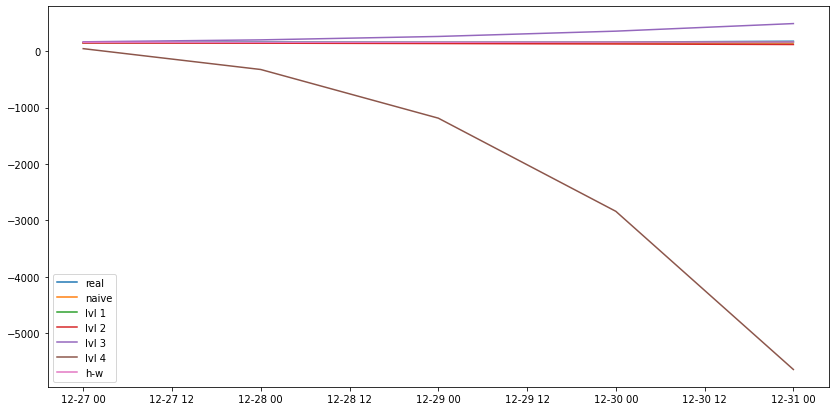

In [317]:
plt.figure(figsize=(14, 7))
plt.plot(real)
plt.plot(naive)
plt.plot(polys[0])
plt.plot(polys[1])
plt.plot(polys[2])
plt.plot(polys[3])
plt.plot(predicted)
plt.legend(['real', 'naive', 'lvl 1', 'lvl 2', 'lvl 3', 'lvl 4', 'h-w'])
plt.show()

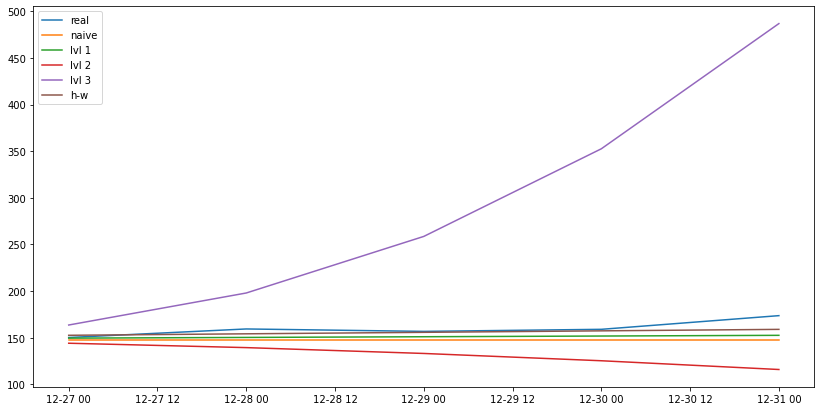

In [319]:
plt.figure(figsize=(14, 7))
plt.plot(real)
plt.plot(naive)
plt.plot(polys[0])
plt.plot(polys[1])
plt.plot(polys[2])
plt.plot(predicted)
plt.legend(['real', 'naive', 'lvl 1', 'lvl 2', 'lvl 3', 'h-w'])
plt.show()

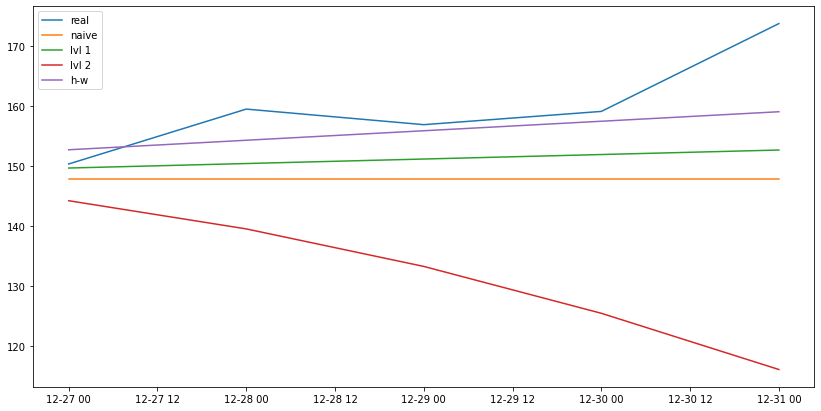

In [320]:
plt.figure(figsize=(14, 7))
plt.plot(real)
plt.plot(naive)
plt.plot(polys[0])
plt.plot(polys[1])
plt.plot(predicted)
plt.legend(['real', 'naive', 'lvl 1', 'lvl 2', 'h-w'])
plt.show()

In [326]:
mean = np.mean([naive, polys[0], polys[1], predicted], axis=0)

In [327]:
mean

array([148.57207143, 147.98064048, 146.99966312, 145.62913933,
       143.86906914])

In [328]:
stds = np.std([naive, polys[0], polys[1], predicted], axis=0)

In [329]:
stds

array([ 3.08038993,  5.42330451,  8.45643659, 12.17075176, 16.56298387])

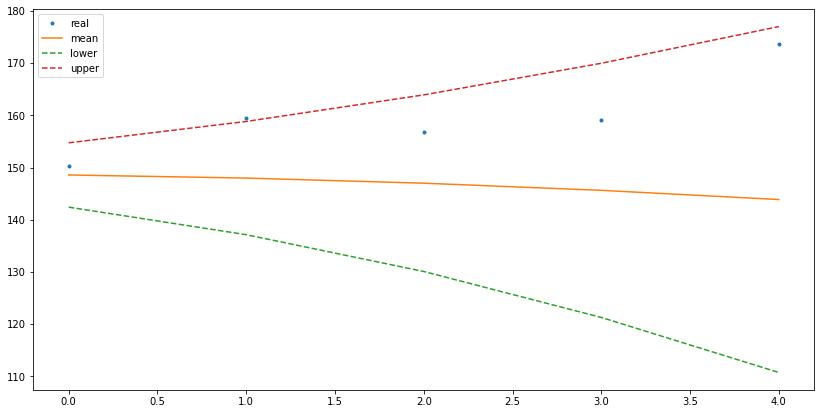

In [332]:
plt.figure(figsize=(14, 7))
plt.plot(real.values, '.')
plt.plot(mean)
plt.plot(mean - 2 * stds, '--')
plt.plot(mean + 2 * stds, '--')
plt.legend(['real', 'mean', 'lower', 'upper'])
plt.show()